In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score,accuracy_score,precision_score,confusion_matrix
from math import sqrt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def read_data():
    data= sns.load_dataset("iris")
    df=data.copy()
    return df
df=read_data()

In [16]:
def feature_splitting(df):
    x=df.drop(['species'],axis=1)
    y=df['species']
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2020,stratify=y)
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = feature_splitting(df)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
k=sqrt(df.shape[0]) ## K value by standard method
k

(120, 4) (120,)
(30, 4) (30,)


12.24744871391589

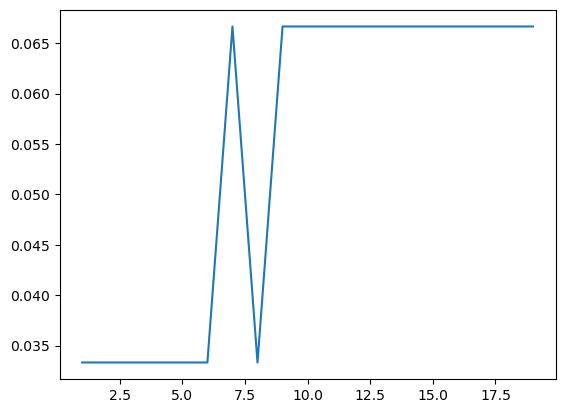

In [44]:
error=[] ## k value by error method
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    error.append(1-accuracy_score(y_test,kn_pred))
        
plt.plot(range(1,20),error)

accuracy of KNN model is -  0.9666666666666667
confusion metrix of KNN model is - 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


<Axes: >

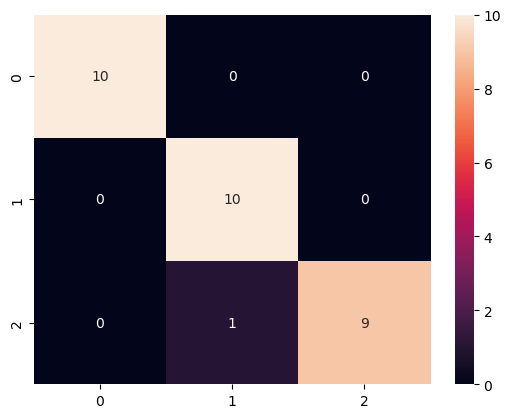

In [79]:
## KNN classification model

def knn_model(x_train,y_train,x_test):
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    return knn_pred

knn_pred=knn_model(x_train,y_train,x_test)

def knn_validation(y_test,knn_pred):
    knn_acc = accuracy_score(y_test,knn_pred)
    knn_conf = confusion_matrix(y_test,knn_pred)
    return knn_acc,knn_conf

knn_acc,knn_conf = knn_validation(y_test,knn_pred)
print("accuracy of KNN model is - ",knn_acc)
print("confusion metrix of KNN model is - \n",knn_conf)
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

accuracy of logistic regression model is -  0.9333333333333333
confusion metrix of logistic regression model is - 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<Axes: >

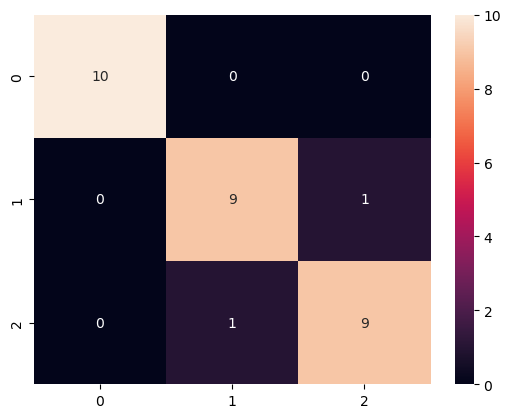

In [78]:
## Logistic Regression model
def lrg_model(x_train,y_train,x_test):
    lrg=LogisticRegression()
    lrg.fit(x_train,y_train)
    lrg_pred=lrg.predict(x_test)
    return lrg_pred

lrg_pred=lrg_model(x_train,y_train,x_test)

def lrg_validation(y_test,lrg_pred):
    lrg_acc = accuracy_score(y_test,lrg_pred)
    lrg_conf = confusion_matrix(y_test,lrg_pred)
    return lrg_acc,lrg_conf

lrg_acc,lrg_conf = lrg_validation(y_test,lrg_pred)
print("accuracy of logistic regression model is - ",lrg_acc)
print("confusion metrix of logistic regression model is - \n",lrg_conf)
sns.heatmap(confusion_matrix(y_test,lrg_pred),annot=True)

accuracy of descision tree model is -  0.9333333333333333
confusion metrix of descision tree model is - 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<Axes: >

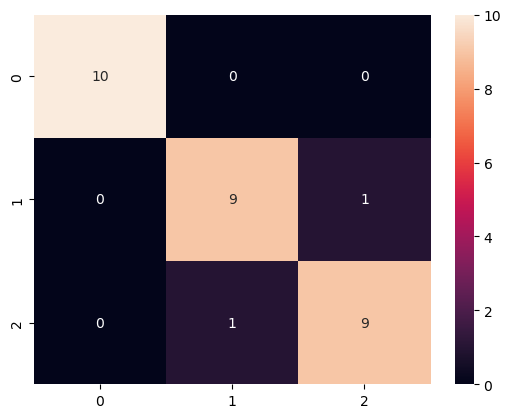

In [77]:
## Descision Tree  model
def dt_model(x_train,y_train,x_test):
    dt=DecisionTreeClassifier(criterion='entropy',max_depth=15)
    dt.fit(x_train,y_train)
    dt_pred=dt.predict(x_test)
    return dt_pred

dt_pred=dt_model(x_train,y_train,x_test)

def dt_validation(y_test,dt_pred):
    dt_acc = accuracy_score(y_test,dt_pred)
    dt_conf = confusion_matrix(y_test,dt_pred)
    return dt_acc,dt_conf

dt_acc,dt_conf = dt_validation(y_test,dt_pred)
print("accuracy of descision tree model is - ",dt_acc)
print("confusion metrix of descision tree model is - \n",dt_conf)
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

accuracy of random forest model is -  0.9333333333333333
confusion metrix of random forest model is - 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<Axes: >

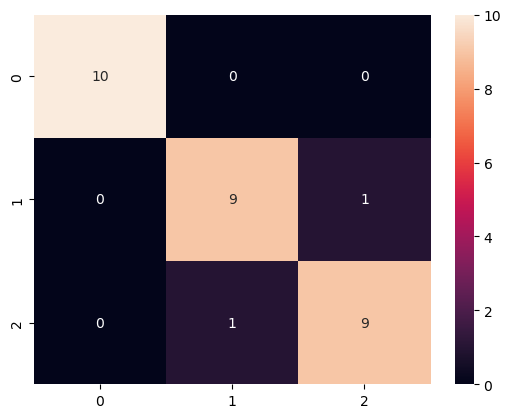

In [76]:
## Random forest model
def rf_model(x_train,y_train,x_test):
    rf=RandomForestClassifier(criterion='entropy',max_depth=10)
    rf.fit(x_train,y_train)
    rf_pred=rf.predict(x_test)
    return rf_pred

rf_pred=rf_model(x_train,y_train,x_test)

def rf_validation(y_test,rf_pred):
    rf_acc = accuracy_score(y_test,rf_pred)
    rf_conf = confusion_matrix(y_test,rf_pred)
    return rf_acc,rf_conf

rf_acc,rf_conf = rf_validation(y_test,rf_pred)
print("accuracy of random forest model is - ",rf_acc)
print("confusion metrix of random forest model is - \n",rf_conf)
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)

accuracy of support vector machine model is -  1.0
confusion metrix of support vector machine model is - 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


<Axes: >

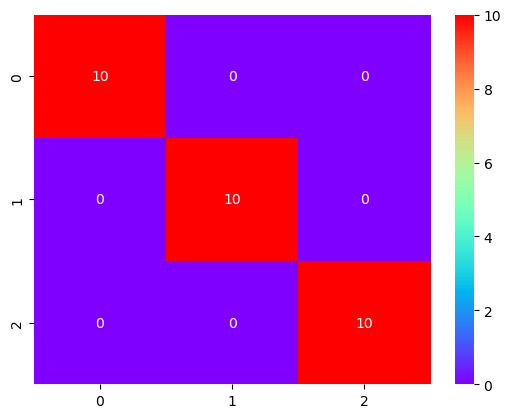

In [80]:
## Support vector machine model
def svm_model(x_train,y_train,x_test):
    svm=SVC(kernel='linear',random_state=123)
    svm.fit(x_train,y_train)
    svm_pred=svm.predict(x_test)
    return svm_pred

svm_pred=svm_model(x_train,y_train,x_test)

def svm_validation(y_test,svm_pred):
    svm_acc = accuracy_score(y_test,svm_pred)
    svm_conf = confusion_matrix(y_test,svm_pred)
    return svm_acc,svm_conf

svm_acc,svm_conf = svm_validation(y_test,svm_pred)
print("accuracy of support vector machine model is - ",svm_acc)
print("confusion metrix of support vector machine model is - \n",svm_conf)
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,cmap='rainbow')

## Accurancy score of support vector machine model with kernal linear is 100% . It is highest accurancy score.
## This model consider as best model to predict.